In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

%load_ext autoreload
%autoreload 2
import emulator

### Build emulators

In [4]:
statistic = 'upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
testmean = True

tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag

res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))

training_dir = '{}training_{}{}/'.format(res_dir, statistic, traintag)
hyperparams = "../training_results/{}_training_results{}.dat".format(statistic, gptag)

testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)

emu_upf = emulator.Emulator(statistic, training_dir=training_dir, testing_dir=testing_dir, 
                        gperr=gperr, testmean=testmean, hyperparams=hyperparams)

Loading training data
Nparams: 18
Loading testing data
Nparams: 18
[[  5.8594629   8.1676376   6.3581116  11.5380904  10.1469905  13.8155106
   11.8332469   6.8321602   8.5950895  10.6718552   8.7566686   9.8797311
    9.7616466  13.8155106  10.9692899   8.0979637   9.8462436  10.4503333
  -13.8155106]
 [  3.6035762   4.0365862   3.8133121   5.6284661   6.2548022  12.5299345
    9.3174713   4.2630462   6.1305682   8.0635817   5.8475125   9.31791
    7.9384934  13.8155106  10.4897704   4.9610536   5.9086426   6.9178589
  -10.0069587]
 [  2.156036   13.8155106   2.2228816   4.2134333   4.1215304  10.4525243
    7.4169512   2.6543469   4.6224265   6.7089297   4.1870604   8.6753318
    6.7475655  13.8155106   8.9993113   3.3374637   4.2496607   5.3282362
  -11.3527772]
 [  1.5670218  13.8155106   1.5908974   3.9536928   3.3769529  10.0354814
    6.7497686   2.1244114   4.1257994   6.5774909   3.9973968   8.9540637
    6.6799104  13.8155106   8.0522438   2.7640253   3.7658395   4.8718942
  

In [5]:
emu_upf.build()

Rebuilding emulators
0.9243891989999999
1.0000000000000002
Computed GP 0
0.628671781
1.0
Computed GP 1
0.2885952795
0.9999999999999999
Computed GP 2
0.18338487649999996
1.0000000000000002
Computed GP 3
0.0810740845
0.9999999999999999
Computed GP 4
0.0395484115
1.0000000000000002
Computed GP 5
0.018513691999999998
1.0000000000000002
Computed GP 6
0.005758934500000001
0.9999999999999999
Computed GP 7
0.0021596485000000003
0.9999999999999998
Computed GP 8


In [30]:
emu_upf.predict([3.00915000e-01, 4.78199000e-02, 8.08756000e-01, 6.82317000e-01,
   9.62515000e-01, 3.45000000e+00, -9.96513000e-01, 6.99798100e+13,
   1.51675100e+00, 2.16556400e+10, 3.29329600e-01, 1.53484300e-01,
   1.19192800e+00, 1.71367200e+00, 9.23339900e-01, 4.75841344e-03,
   9.88378900e-01, 5.49319500e-01])

Predict
[[ 3.00915000e-01  4.78199000e-02  8.08756000e-01  6.82317000e-01
   9.62515000e-01  3.45000000e+00 -9.96513000e-01  6.99798100e+13
   1.51675100e+00  2.16556400e+10  3.29329600e-01  1.53484300e-01
   1.19192800e+00  1.71367200e+00  9.23339900e-01  4.75841344e-03
   9.88378900e-01  5.49319500e-01]]
[2.10973612] [[1.14462067]]
0.004556288451427804


array([0.92439195, 0.62880628, 0.28862379, 0.18339712, 0.08115368,
       0.04713148, 0.02948581, 0.01112917, 0.00455629])

In [29]:
emu_upf.predict([3.00915000e-01, 4.78199000e-02, 8.08756000e-01, 6.82317000e-01,
   9.62515000e-01, 3.45000000e+00, -9.96513000e-01, 6.99798100e+13,
   1.51675100e+00, 2.16556400e+10, 3.29329600e-01, 1.53484300e-01,
   1.19192800e+00, 1.71367200e+00, 9.23339900e-01, -1.40117444e-01,
   9.88378900e-01, 5.49319500e-01])

Predict
[[ 3.00915000e-01  4.78199000e-02  8.08756000e-01  6.82317000e-01
   9.62515000e-01  3.45000000e+00 -9.96513000e-01  6.99798100e+13
   1.51675100e+00  2.16556400e+10  3.29329600e-01  1.53484300e-01
   1.19192800e+00  1.71367200e+00  9.23339900e-01 -1.40117444e-01
   9.88378900e-01  5.49319500e-01]]
[2.10973612] [[1.14462067]]
0.004556288451427804


array([0.92439195, 0.62880628, 0.28862379, 0.18339712, 0.08115368,
       0.04713148, 0.02948581, 0.01112917, 0.00455629])

In [26]:
a1 = [ 0.30184429,  0.04824399,  0.80580886,  0.682317,    0.962515,    3.45,
  -0.99651271, 14.15351517,  1.01215505, 11.84886984,  0.32304271,  0.35214284,
   1.08504415,  1.09958419,  1.00386091, -0.35787983,  1.25069695,  0.54597763]
#[2.08666539] [[0.05288513]]
#0.004506463774986815
a2 = [ 0.30184429,  0.04824399,  0.80580886,  0.682317,    0.962515,    3.45,
  -0.99651271, 14.15351517,  1.01215505, 11.84886984,  0.32304271,  0.35214284,
   1.08504415,  1.09958419,  1.00386091, -0.27826592,  1.25069695,  0.54597763]
#[1.76691039] [[0.03568255]]

In [28]:
print(emu.predict(a1))
print(emu.predict(a2))

Predict
[[ 0.30184429  0.04824399  0.80580886  0.682317    0.962515    3.45
  -0.99651271 14.15351517  1.01215505 11.84886984  0.32304271  0.35214284
   1.08504415  1.09958419  1.00386091 -0.35787983  1.25069695  0.54597763]]
[2.08666534] [[0.05288513]]
0.004506463679554704
[0.92750636 0.6602411  0.34272071 0.23289702 0.11730257 0.06369838
 0.03297672 0.01151601 0.00450646]
Predict
[[ 0.30184429  0.04824399  0.80580886  0.682317    0.962515    3.45
  -0.99651271 14.15351517  1.01215505 11.84886984  0.32304271  0.35214284
   1.08504415  1.09958419  1.00386091 -0.27826592  1.25069695  0.54597763]]
[1.76691035] [[0.03568255]]
0.00381590529049124
[0.92664348 0.65386962 0.33147769 0.2225773  0.10931927 0.05801061
 0.02935927 0.00994783 0.00381591]


In [32]:
# cosmo, hod = 5, 9
a3 = [ 2.819390e-01,  4.475650e-02,  8.177120e-01,  6.973170e-01,  9.514040e-01,
   3.700000e+00, -1.089110e+00,  1.859926e+14,  7.346326e-01,  1.319640e+11,
   5.086696e-02,  2.566772e-01,  2.052666e-01,  1.538114e+00,  1.068934e+00,
  -1.099429e-01,  1.993821e+00,  5.205967e-01]
emu.predict(a3)

Predict
[[ 2.819390e-01  4.475650e-02  8.177120e-01  6.973170e-01  9.514040e-01
   3.700000e+00 -1.089110e+00  1.859926e+14  7.346326e-01  1.319640e+11
   5.086696e-02  2.566772e-01  2.052666e-01  1.538114e+00  1.068934e+00
  -1.099429e-01  1.993821e+00  5.205967e-01]]
[2.10973612] [[1.14462067]]
0.004556288451427804


array([0.92439195, 0.62880628, 0.28862379, 0.18339712, 0.08115368,
       0.04713148, 0.02948581, 0.01112917, 0.00455629])

In [13]:
statistic = 'wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
testmean = True

tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag

res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))

training_dir = '{}training_{}{}/'.format(res_dir, statistic, traintag)
hyperparams = "../training_results/{}_training_results{}.dat".format(statistic, gptag)

testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)

emu_wp = emulator.Emulator(statistic, training_dir=training_dir, testing_dir=testing_dir, 
                        gperr=gperr, testmean=testmean, hyperparams=hyperparams)

Loading training data
Nparams: 18
Loading testing data
Nparams: 18
[[ -2.0415439  13.8155106  -1.0328671  12.7602269  13.8155106  13.8155106
    4.3896638  -0.8938332   0.7965674   4.1053239   2.4198367   4.9187064
    8.0911687   3.5096385  13.8155106   6.5343033  13.8155106  13.8155106
  -13.8155106]
 [ -2.5848885   6.4587976  -1.696402   11.5660743  13.8155106  13.8155106
    4.2019985  -1.5961482   0.0207318   4.2028474   2.5502089   4.7163843
    7.3288639   3.9741625  13.8155106   6.2805533  13.8155106  13.8155106
  -12.0189452]
 [ -2.9807076   5.3391911  -2.3328933  12.3467358  13.8155106  13.8155106
    3.7598349  -2.3122218  -0.7497702   4.6767774   2.4044825  13.3816577
    5.9097675   5.2755111  13.8155106   5.2353684  10.1007892  13.8155106
   -4.2712169]
 [ -3.0454412   4.7279243  -2.808134   10.3309986  12.6560596   7.5759221
    2.657207   -2.6411207  -1.3172801   8.2663983   3.0315259  13.8155106
    5.0616493   5.2421729   7.7352215   3.644647    8.6898356  13.8155106


In [14]:
emu_wp.build()

Rebuilding emulators
5033.794894500001
0.9999999999999998
Computed GP 0
2298.4947193499997
1.0000000000000002
Computed GP 1
921.43626865
1.0
Computed GP 2
311.4072053
1.0
Computed GP 3
128.477392925
0.9999999999999999
Computed GP 4
69.9525234
1.0
Computed GP 5
37.494628295000005
0.9999999999999999
Computed GP 6
17.061447733
0.9999999999999998
Computed GP 7
5.672121289999999
1.0000000000000002
Computed GP 8


In [15]:
rmin = 0.1
rmax = 50
nbins = 9
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1) # Note the + 1 to nbins
r_logavg = 10 ** (0.5 * (np.log10(rbins)[1:] + np.log10(rbins)[:-1]))

In [37]:
r_upf = np.linspace(5, 45, 9)
r_upf

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45.])

In [18]:
hods_test = np.loadtxt("/mount/sirocco2/zz681/emulator/CMASSLOWZ/test_galaxy_mocks_wp_RSD/test_galaxy_mocks_new_f_env/HOD_test_np11_n1000_new_f_env.dat")
nhodparams_test = hods_test.shape[1]
hods_test[:,0] = np.log10(hods_test[:,0])
hods_test[:,2] = np.log10(hods_test[:,2])
cosmos_test = np.loadtxt("../CMASS/Gaussian_Process/hod_file/cosmology_camb_test_box_full.dat")
ncosmoparams_test = cosmos_test.shape[1]
nparams_test = nhodparams_test + ncosmoparams_test

In [19]:
print(hods_test.shape)
print(cosmos_test.shape)

(1000, 11)
(7, 7)


In [20]:
hod_mean = np.mean(hods_test, axis=0)
print(hod_mean.shape)
cosmo_mean = np.mean(cosmos_test, axis=0)
print(cosmo_mean.shape)
params_mean = np.concatenate((cosmo_mean, hod_mean))
print(params_mean.shape)

(11,)
(7,)
(18,)


In [21]:
pdict_mean = {}
param_names_ordered = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w',
                        'M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f',
                        'f_env', 'delta_env', 'sigma_env']
for i in range(len(param_names_ordered)):
    print("{}: {:.3f}".format(param_names_ordered[i], params_mean[i]))
    pdict_mean[param_names_ordered[i]] = params_mean[i]

Omega_m: 0.302
Omega_b: 0.048
sigma_8: 0.806
h: 0.682
n_s: 0.963
N_eff: 3.450
w: -0.997
M_sat: 14.154
alpha: 1.012
M_cut: 11.849
sigma_logM: 0.323
v_bc: 0.352
v_bs: 1.085
c_vir: 1.100
f: 1.004
f_env: 0.004
delta_env: 1.251
sigma_env: 0.546


In [22]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [23]:
pdict_mean

{'Omega_m': 0.3018442857142857,
 'Omega_b': 0.04824398571428572,
 'sigma_8': 0.8058088571428572,
 'h': 0.682317,
 'n_s': 0.9625150000000001,
 'N_eff': 3.4499999999999997,
 'w': -0.9965127142857143,
 'M_sat': 14.15351517106943,
 'alpha': 1.0121550539,
 'M_cut': 11.84886983807495,
 'sigma_logM': 0.32304270724000034,
 'v_bc': 0.35214283716430034,
 'v_bs': 1.0850441469000012,
 'c_vir': 1.0995841902000008,
 'f': 1.0038609099999987,
 'f_env': 0.003558546714400002,
 'delta_env': 1.2506969546,
 'sigma_env': 0.5459776326000003}

[<emulator.Emulator object at 0x7f591edede48>, <emulator.Emulator object at 0x7f59201e1f28>]


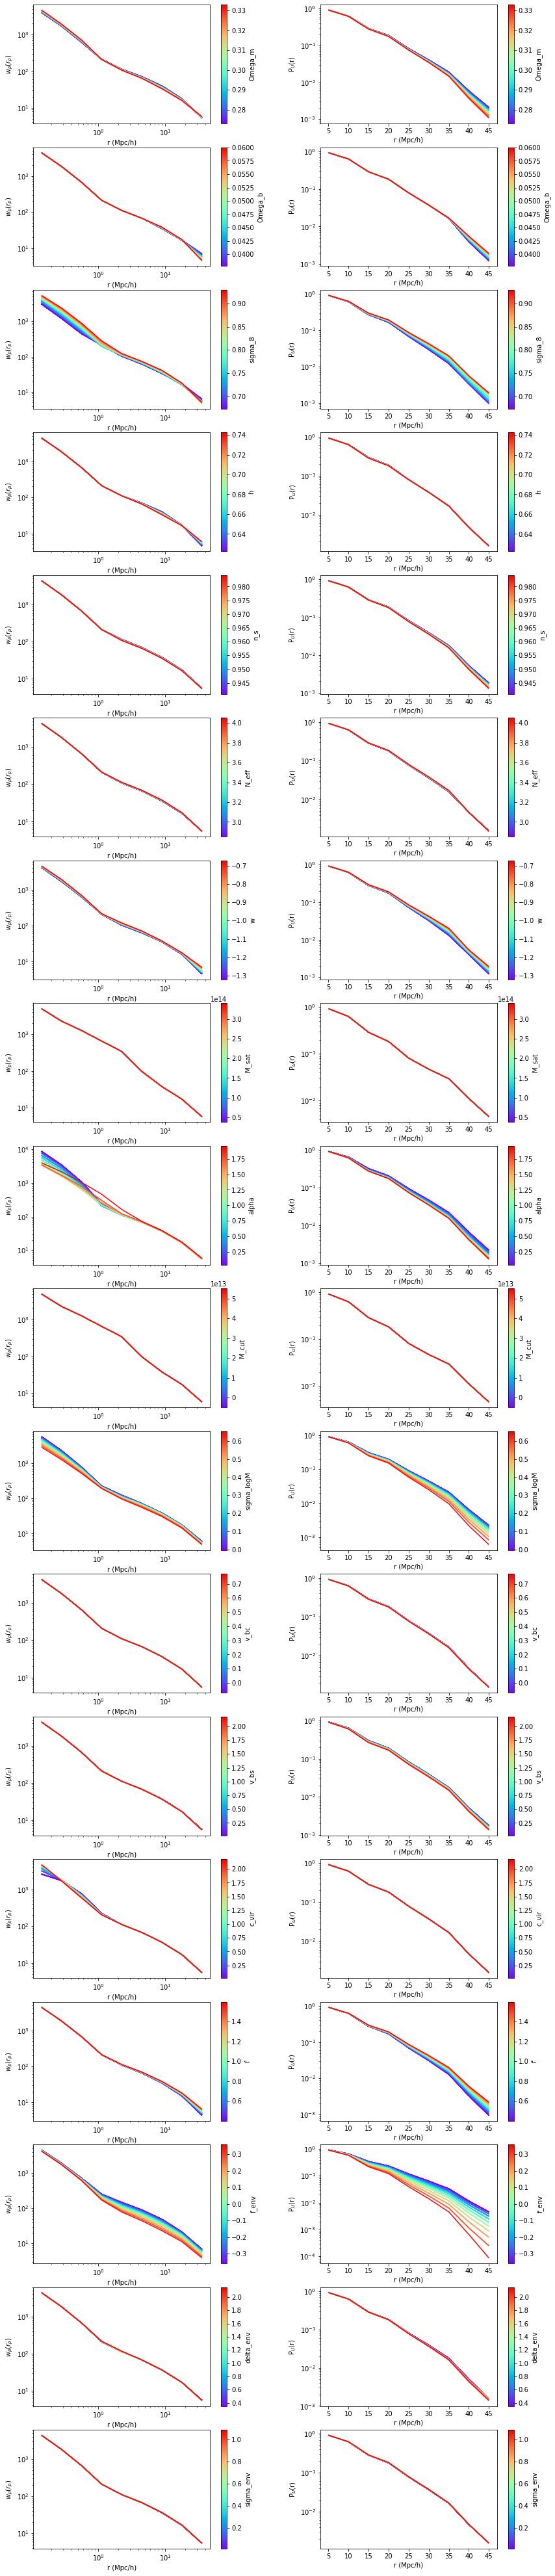

In [42]:
statistics = ['wp', 'upf']
emus = [emu_wp, emu_upf]
print(emus)
nrows = len(pdict_mean.keys())
#nrows = 2
ncols = len(emus)

panel_size = (4,7)
figsize = (panel_size[1]*ncols, panel_size[0]*nrows)
fig, axarr = plt.subplots(nrows, ncols, figsize=figsize)
plt.subplots_adjust(wspace=0.3)
for i in range(nrows):
    
    
    pn = param_names_ordered[i]
    #vals = np.linspace(0.2, 0.4, 2)
    val_mean = pdict_mean[pn]

    
    for j in range(ncols):
        emu = emus[j]
        statistic = statistics[j]
        ax = axarr[i][j]

        preds = []
        rs = []

        #vals = np.linspace(0.7*val_mean, 1.3*val_mean, 10)
        pmin, pmax = emu.get_param_bounds(pn)
        vals = np.linspace(pmin, pmax, 10)
        pdict = pdict_mean.copy()
        
        for val in vals:
            pdict[pn] = val
            pred = emu.predict(pdict)
            if statistic=='wp':
                rs.append(r_logavg)
            elif statistic=='upf':
                rs.append(r_upf)

            preds.append(pred)

            lc = multiline(rs, preds, vals, cmap='rainbow', ax=ax)

            
        #if j==ncols-1:
        axcb = fig.colorbar(lc, ax=ax)
        axcb.set_label(pn)

        ax.set_yscale("log")        
        ax.set_xlabel("r (Mpc/h)")
    
        if statistic == 'upf':
            ax.set_ylabel(r"P$_U$(r)")

        elif statistic == 'wp':
            ax.set_ylabel(r'$w_p$($r_p$)')
            ax.set_xscale('log')